In [1]:
import hdbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

import sys
sys.path.append('..')
from src.band_plotters import DATA_DIRECTORY
from src.cluster_plotters import plot_cluster_ellipses

In [2]:
FINGERPRINT_NAME = "all_k_branches_histogram"
FINGERPRINT_LENGTH = 120
PERPLEXITY = 30
INPUT_NAME = f"{FINGERPRINT_NAME}_perplexity_{PERPLEXITY}_length_{FINGERPRINT_LENGTH}.csv"

## Load Data

In [3]:
df = pd.read_csv(f"../fingerprints/{INPUT_NAME}", index_col="ID")
df.head()

,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,binary_flatness,horz_flat_seg,exfoliation_eg,...,112,113,114,115,116,117,118,119,fx,fy
ID,,,,,,,,,,,,,,,,,,,,,
2dm-1,IrF2,AB2,164,3,0,0.095102,bottom-up,0,0,0.234620,...,11.0,18.0,12.0,9.0,10.0,16.0,12.0,18.0,-54.525272,31.900337
2dm-2,Ba2Sb,AB2,164,3,1,0.387410,bottom-up,0,0,0.210650,...,26.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,-83.819960,-37.819603
2dm-3,TlS,AB,2,4,4,0.846460,bottom-up,1,3,0.095794,...,77.0,50.0,17.0,0.0,0.0,0.0,0.0,0.0,76.890816,-31.039242
2dm-4,MoCl2,AB2,166,5,4,0.713760,bottom-up,0,0,-0.055818,...,25.0,23.0,41.0,26.0,43.0,38.0,49.0,73.0,1.186618,83.082000
2dm-6,RuI2,AB2,164,3,1,0.264930,bottom-up,0,0,0.084831,...,20.0,19.0,27.0,18.0,15.0,26.0,22.0,26.0,-58.914627,52.385628


## Cluster

In [4]:
fingerprint_cols = [str(i) for i in range(FINGERPRINT_LENGTH)]

In [5]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='minkowski', cluster_selection_method='leaf', min_cluster_size=4, min_samples=4, p=0.2)
clusterer.fit(df[fingerprint_cols])

df["labels"] = clusterer.labels_

In [6]:
from ipywidgets import interact

def view_cluster(label):
    display(df[df.labels==label].head(100))

    num_plots = len(df[df.labels==label])

    fig, ax = plt.subplots(num_plots, 1, figsize=(4, 1*num_plots))

    for i, index in enumerate(df[df.labels==label].index):
        ax[i].plot(np.linspace(0, FINGERPRINT_LENGTH, FINGERPRINT_LENGTH), df.loc[index][fingerprint_cols])


    
    
interact(view_cluster, label=(-1, len(np.unique(df.labels))-2, 1))

interactive(children=(IntSlider(value=31, description='label', max=63, min=-1), Output()), _dom_classes=('widg…

<function __main__.view_cluster(label)>

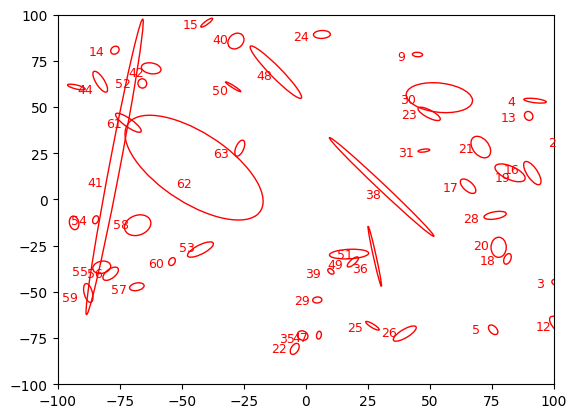

In [12]:
fig, ax = plt.subplots()
ax = plot_cluster_ellipses(df, ax=ax, color="red")
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
plt.show()